# Lab 3: Further matrix calculations



## 1. Matrix multiplication

Here we will return to the work you did in Lab 1, where section 3 was on matrix multiplication.

Our goal here is to compare the running time of your `mult` procedure with that of the built-in matrix multiplication (e.g. the result of doing `A*B`). We already did that quickly using `%timeit` in Lab 1, but here we will do a deeper anaylsis using the technique used in Lab 2 for `time_discrete_log`.

Note that you can generate random matrices for testing using this command:

In [1]:
%display latex
A = random_matrix(ZZ, 5, 5)
B = random_matrix(ZZ, 5, 5)
A, B

(
[ 0  0  1  0  0]  [  0   2   0   0  -1]
[-1  2  4 17  0]  [ -1  -1  -1   4   0]
[-1  4  8 -1  0]  [  1 497   1  -1  -1]
[ 3  1  1 -1 -1]  [  1   1  -1  -1   0]
[ 0 -1 -1 -1  1], [ -1   2 -22   0  34]
)

Recall from Lab 2 that we can use `time.time()` to measure the running time of some code. Here we record the running time to multiply two random $100\times100$ matrices:

In [4]:
import time
A = random_matrix(ZZ,100,100)
B = random_matrix(ZZ,100,100)
start_time = time.time() 
A*B
print(time.time() - start_time)

0.00221014022827


<div class="alert alert-info">
    <h3>Exercise 1.1</h3>
    
**(a)** Write a function `time_mult` that takes in an integer $N$, and returns the time taken by `mult` to multiply two randomly-generated $N\times N$ matrices.

**(b)** Produce a plot of running time against size of matrix for the two methods (`mult` and the built-in version). These should be on the same plot, shown with different colours.

**(c)** Comment on the results -- for example, does it look like there is a long-term trend?

</div>

In [6]:
def mult(A,B):
    numrowsA=A.nrows()
    numcolsA=A.ncols()
    numcolsB=B.ncols()
    AB=Matrix(QQ,numrowsA,numcolsB)
    for i in range(numrowsA):
        for j in range(numcolsB):
            for k in range(numcolsA):
                AB[i,j]=A[i,k]*B[k,j]+AB[i,j]
    return AB

In [7]:
def time_mult(n):
    A = random_matrix(ZZ,n,n)
    B = random_matrix(ZZ,n,n)
    start_time = time.time() 
    mult(A,B)
    return time.time() - start_time

In [8]:
def time_builtin(n):
    A = random_matrix(ZZ,n,n)
    B = random_matrix(ZZ,n,n)
    start_time = time.time() 
    A*B
    return time.time() - start_time

In [9]:
times_builtin = [ time_builtin(n) for n in range(1,99)]
times_mult = [time_mult(n) for n in range(1,99)]

In [7]:
size = [n for n in range(1,99)]
import matplotlib.pyplot as plt

ax = plt.subplot(111)


plt.scatter(size,times_builtin,label="Built in function")
plt.scatter(size,times_mult,label="Mult function")

plt.legend()

plt.title('Running time against matrix size')
plt.ylabel("Time taken (sec)")
plt.xlabel('Size of matrix (int)')

plt.show()

<Figure size 640x480 with 1 Axes>

## 2. Polynomial interpolation

Our goal here is to find a polynomial which "goes through" some given points. More precisely, a polynomial $P$ so that $P(x_i) = y_i$ for some given pairs of points $(x_i, y_i)$, $1\leq i \leq n$.

We will start with the following list of points to get a feel for the method:

In [8]:
pts = [[1,1], [2,2], [3,0]]

Here we note that there are $n=3$ points, and we extract the $x_i$'s:

In [9]:
n = len(pts)
xs = [pt[0] for pt in pts]
(n, xs)

(3, [1, 2, 3])

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>
    
Extract the $y_i$'s.

</div>

In [10]:
ys = [pt[1] for pt in pts]
ys

[1, 2, 0]

Let me _claim_ for now that we can solve the problem using a polynomial of degree $n-1$. So for our example, this would be a quadratic with unknown coefficients $a_i$:

In [11]:
var("x a0 a1 a2")
P(x) = a0 + a1*x + a2*x^2
P(x)

a2*x^2 + a1*x + a0

The given points allow us to write a system of equations:

In [12]:
eq=[]
for i in range(3):
     eq.append(P(xs[i])==ys[i])
eq

[a0 + a1 + a2 == 1, a0 + 2*a1 + 4*a2 == 2, a0 + 3*a1 + 9*a2 == 0]

Sage can solve this for us:

In [13]:
solve(eq,a0,a1,a2)

[[a0 == -3, a1 == (11/2), a2 == (-3/2)]]

Another way to find the solution is using the coefficient matrix for the system. We can construct that by specifying a function $(i,j)\to x_i^j$ that defines the $(i,j)$ entry of the matrix, which we do as follows:

In [14]:
V = matrix(QQ, n, n, lambda i, j: xs[i]^j)
V

[1 1 1]
[1 2 4]
[1 3 9]

In fact, this is a special form of matrix known as a [Vandermonde matrix](http://doc.sagemath.org/html/en/reference/matrices/sage/matrix/special.html#sage.matrix.special.vandermonde), and Sage has a built-in function that makes them easy to create:

In [15]:
V = matrix.vandermonde(xs)
V

[1 1 1]
[1 2 4]
[1 3 9]

Now we can simply solve the system $V\mathbf{a} = \mathbf{y}$:

In [16]:
a = V.solve_right(vector(ys))
a

(-3, 11/2, -3/2)

We can now build up the polynomial $P$:

In [17]:
P = add([a[i]*x^i for i in [0..2]])
P

-3/2*x^2 + 11/2*x - 3

Let's check that $P$ does what it is meant to:

In [18]:
print([P(x) for x in xs])
[P(x) for x in xs] == ys

[1, 2, 0]


True

<div class="alert alert-info">
    <h3>Exercise 2.2</h3>
    
Produce visual confirmation that $P$ is the correct polynomial, by plotting it on the same graph as the points given in `pts`.

</div>

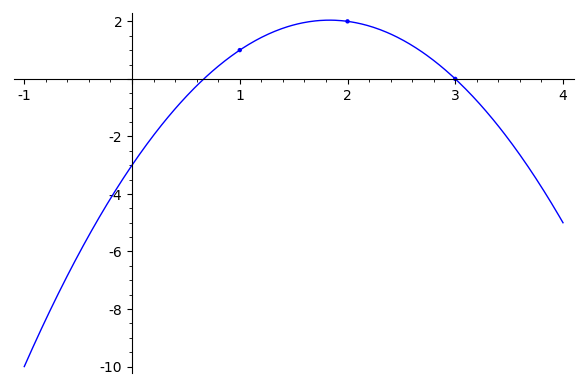

In [19]:
plot(P, (x, -1, 4)) + list_plot(pts)

<div class="alert alert-info">
    <h3>Exercise 2.3</h3>
    
**(a)** Implement a procedure `interpolate` which takes in a list of points, and returns the interpolating polynomial given by the method above.

**(b)** Then write a procedure `show_interpolation` which takes in a list of points, uses `interpolate` to find the interpolating polynomial $P$, then prints out $P(x)$ plus a plot showing $P(x)$ and the given points. Test your function on the list `[[0,7],[1,-5],[3,9],[10,-10]]`.

</div>

In [20]:
def interpolate(pts):
    xs = [pt[0] for pt in pts]
    ys = [pt[1] for pt in pts]
    V = matrix.vandermonde(xs)
    a = V.solve_right(vector(ys))
    var("x")
    P = add([a[i]*x^i for i in [0..(len(pts)-1)]])
    return (P)
    

In [21]:
def show_interpolation(pts):
    P = interpolate(pts)
    return plot(P, (x, pts[0][0]-1, pts[-1][0]+1)) + list_plot(pts)

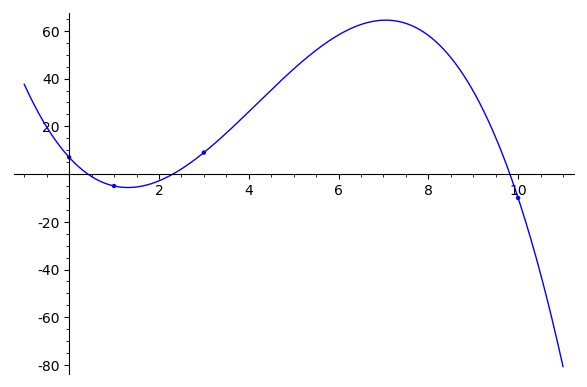

In [22]:
pts = [[0,7],[1,-5],[3,9],[10,-10]]
show_interpolation(pts)

## 3. Computing determinants

Recall that the determinant of an $n\times n$ matrix $A$ with entries $a_{ij}$ is given by $$\det A = \sum_{j=1}^n (-1)^{1+j}a_{1j}\det A_{1j}$$ where $A_{1j}$ is the matrix obtained by deleting row 1 and column $j$ of $A$. This approach to evaluating the determinant is known as "cofactor expansion along the first row".

Sage has a built-in determinant function, but we will implement our own for comparison.

As a first step, we need to look at how to extract the sub-matrix $A_{1j}$. We'll look at how to select parts of a matrix using this example:

In [23]:
A = random_matrix(ZZ,5,5)
A

[ 0  0  0  1 -1]
[ 0  3  0  7  1]
[ 0  0  0  2 -1]
[ 0  1  1 -1  1]
[-1 -2  0  0  1]

The easiest way is just to give a list of the rows and columns that you want -- remembering that they are numbered starting from 0. So here we take rows 0 to 4 (i.e. all the rows) and columns 0, 3 and 4:

In [24]:
A[[0..4],[0,3,4]]

[ 0  1 -1]
[ 0  7  1]
[ 0  2 -1]
[ 0 -1  1]
[-1  0  1]

If we just want to get rid of the 0th row and take rows 1 onward, there is a short way to say that:

In [25]:
A[1:,[0,3,4]]

[ 0  7  1]
[ 0  2 -1]
[ 0 -1  1]
[-1  0  1]

So, to find $A_{1j}$ we need to get rid of the 0th row and give a list of all the columns exluding $j$. For instance, to get rid of the column numbered 3:

In [26]:
A[1:,[i for i in [0..4] if i != 3]]

[ 0  3  0  1]
[ 0  0  0 -1]
[ 0  1  1  1]
[-1 -2  0  1]

Here we use this technique to write the `ourdet` function.

It is _recursive_, meaning that the function makes use of itself to get the answer (finding a $4\times4$ determinant requires working out three $3\times3$ determinants, which themselves require $2\times2$ determinants, ...). The "base case" is when we have a $1\times1$ matrix, for which the determinant is just the single entry in the matrix.

In [27]:
def ourdet(A):
    m, n = A.nrows(), A.ncols()
    if m<>n:
        return("Error: matrix must be square")
    elif n == 1:
        return(A[0,0])
    else:
        det = 0
        for j in range(n):
            det = det + (-1)^j * A[0, j] * ourdet(A[1:,[i for i in [0..n-1] if i != j]])
        return(det)

Let's check the result against Sage's determinant function, for our example matrix:

In [28]:
ourdet(A)

3

In [29]:
A.det()

3

Sage's function is much more efficient, though!

In [30]:
%timeit ourdet(A)

100 loops, best of 3: 13.4 ms per loop


In [31]:
%timeit A.det()

The slowest run took 33.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 149 ns per loop


The `ourdet` function already starts to struggle with $8\times8$ matrices. The following code produces a random $8\times8$ matrix then times the running of `ourdet` on it: _(this will probably take about 5 seconds to run...)_

In [32]:
A8 = random_matrix(ZZ, 8, 8)
st = time.time() 
ourdet(A8)
time.time() - st

4.758945941925049

This is already quite slow, and for a $9\times9$ matrix note that `ourdet` will need to compute 9 separate $8\times8$ determinants, so we'd expect a $9\times9$ example to take about 9 times as long! Following this reasoning, the running time of `ourdet` for $n\times n$ matrices behaves like a multiple of $n!$, which grows very quickly.

In contrast, Sage's determinant function is very quick - let's try a $200\times200$ matrix:

In [33]:
A200 = random_matrix(ZZ, 200, 200)
st = time.time() 
A200.det()
time.time() - st

0.05797910690307617

<div class="alert alert-info">
    <h3>Exercise 3.1</h3>

Perhaps we can we be more efficient by looking for 0s? That is, can we exploit the fact that if $a_{1j}$ then there is no point in working out $\det A_{1j}$?

**(a)** Write a modified version of the `ourdet` procedure (call it `ourdet2`) that uses this idea.

**(b)** Check that `ourdet2` gives the correct answer for the determinant of `A8`.

**(c)** Use `%timeit` to check the running time of `ourdet2(A8)`.

</div>

In [34]:
def ourdet2(A):
    m, n = A.nrows(), A.ncols()
    if m<>n:
        return("Error: matrix must be square")
    elif n == 1:
        return(A[0,0])
    else:
        det = 0
        for j in range(n):
            if A[0,j] == 0:
                det = det + 0
            else:
                det = det + (-1)^j * A[0, j] * ourdet2(A[1:,[i for i in [0..n-1] if i != j]])
        return(det)

In [35]:
ourdet2(A8)

22300824

In [36]:
ourdet(A8)

22300824

In [37]:
%timeit ourdet2(A8)

1 loop, best of 3: 860 ms per loop


In [38]:
%timeit ourdet(A8)

1 loop, best of 3: 4.72 s per loop


<div class="alert alert-info">
    <h3>Exercise 3.2</h3>

**(a)** Produce a plot comparing the running times of `ourdet`, `ourdet2` and Sage's `det` for $n\times n$ matrices where $1\leq n \leq 8$.

**(b)** Produce another plot which checks the running time of `det` for $1\leq n \leq 300$.

</div>

In [39]:
def time(fun,mat):
    import time
    start_time = time.time() 
    fun(mat)
    return time.time() - start_time
    

In [40]:
def timeinb(mat):
    import time
    start_time = time.time() 
    mat.det()
    return time.time() - start_time

In [47]:
ns = range(1,9)
matrices = [random_matrix(ZZ, n, n) for n in ns]
ourdettimes = [time(ourdet,m) for m in matrices]
ourdet2times = [time(ourdet2,m) for m in matrices]
dettimes = [ timeinb(m) for m in matrices]


In [45]:
ourdetOP = [ourdet(m) for m in matrices]
ourdet2OP = [ourdet2(m) for m in matrices]
ourdetOP == ourdet2OP

True

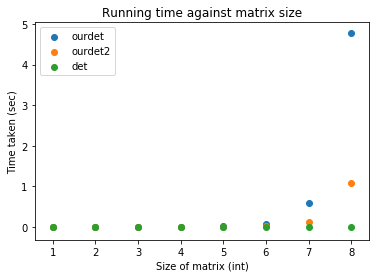

In [48]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)


plt.scatter(ns,ourdettimes,label="ourdet")
plt.scatter(ns,ourdet2times,label="ourdet2")
plt.scatter(ns,dettimes,label="det")

plt.legend()

plt.title('Running time against matrix size')
plt.ylabel("Time taken (sec)")
plt.xlabel('Size of matrix (int)')

plt.show()

<div class="alert alert-info">
    <h3>Exercise 3.3</h3>

You probably found that `ourdet` and `ourdet2` have similar running times. However, this could be because our matrices only very rarely have 0s in them.

Produce a plot comparing the running time of `ourdet` and `ourdet2` when computing $6\times6$ determinants -- this should show the running time against the `density` of the random matrix, e.g.:

    A = random_matrix(ZZ, 6, 6, density = 0.75)

will have 75% of its entries nonzero. Try using densities 0.05, 0.1, 0.15, ..., 0.95, 1.

</div>

In [43]:
densities = [ x*0.05 for x in range(1,21)]
matrices = [random_matrix(ZZ, 6, 6, density = x) for x in densities]

ourdettimes = [time(ourdet,m) for m in matrices]
ourdet2times = [time(ourdet2,m) for m in matrices]

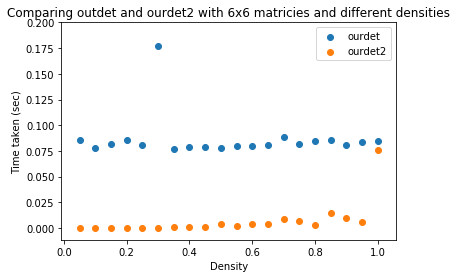

In [44]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)


ax.scatter(densities,ourdettimes,label="ourdet")
ax.scatter(densities,ourdet2times,label="ourdet2")

ax.legend()

plt.title('Comparing outdet and ourdet2 with 6x6 matricies and different densities')
plt.ylabel("Time taken (sec)")
plt.xlabel('Density')

plt.show()